# Julia K-Means

# K-Means von Kaggle

https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python

In [83]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize

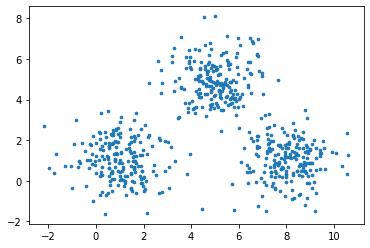

In [35]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)


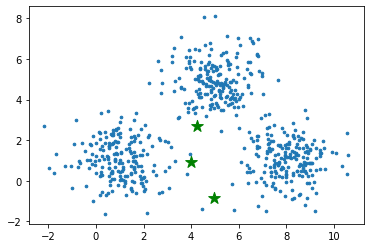

In [38]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [39]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[1.00231189, 0.86981775],
       [5.30594443, 4.1854687 ],
       [8.12431628, 0.5597884 ]])

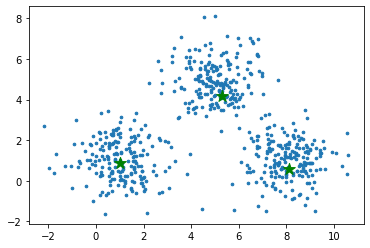

In [40]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

## Test mit unserem Datensatz

In [41]:
df = pd.read_csv("../songs_25.csv")

In [42]:
df

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,stemmed_text
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...,sometim when i 'm mad there 's a part of me t...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...,tri to sneak out without say with my loudest ...
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...,you feel bad let me tell you we all get the b...
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...,down in the street they 're all sing and shou...
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...,just a notion that 's all just a feel that yo...
...,...,...,...,...,...,...,...,...,...,...
6795,6795,ZZ Top,36-22-36,what what what you want? hey my thing is a ...,646,Rock,Pop,True,real fine real fine round thing thing thing th...,what what what you want ? hey my thing is a r...
6796,6796,ZZ Top,Deal Goin' Down,when the deal goin' down and you gonna take yo...,746,Rock,Pop,True,deal chance mystery trance future deal deal no...,when the deal goin ' down and you gon na take...
6797,6797,ZZ Top,Can't Stop Rockin',i heard about the rock for sometime i know. ...,995,Rock,Pop,True,easy wrong right low loose high rock roll rock...,i heard about the rock for sometim i know . i...
6798,6798,ZZ Top,I Got The Message,i'm picking up on a signal that's in the air ...,495,Rock,Pop,True,straight electric about empty straight straigh...,i 'm pick up on a signal that 's in the air t...


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

data = df['text']
tf_idf_vectorizor = TfidfVectorizer(
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
sklearn_pca = PCA(n_components = 3)
data= sklearn_pca.fit_transform(tf_idf_array)

In [184]:
data

array([[-0.00516614,  0.02585715, -0.03995502],
       [-0.05966107, -0.17054299, -0.02597091],
       [ 0.04366501,  0.05524635, -0.04533299],
       ...,
       [ 0.06381709, -0.09392827, -0.0243994 ],
       [-0.02919713,  0.01659665, -0.00725334],
       [-0.15961286, -0.14026757, -0.08490195]])

In [206]:
# Number of clusters
K = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean


In [207]:
c

3

In [208]:
centers

array([[ 0.01533461, -0.12624164,  0.01179926],
       [ 0.03881146,  0.0917059 ,  0.10373157],
       [-0.19199622, -0.04598827,  0.13574016]])

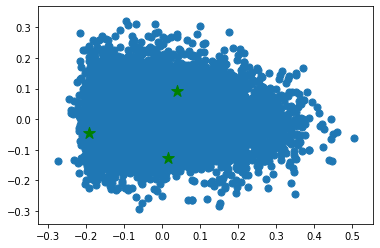

In [209]:
# Plot the data and the centers generated as random
#plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [210]:
from copy import deepcopy

K = 3
# Number of training data
n =data.shape[0]
# Number of features in the data
c = data.shape[1]

In [211]:
c

3

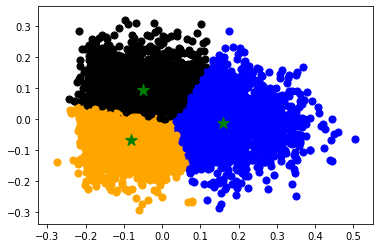

In [213]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis= 0)
centers = np.random.randn(K,c)*std + mean

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
    # Assign all training data to closest center
    cluster_labels = np.argmin(distances, axis = 1)
    
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(data[cluster_labels == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
colors=['orange', 'blue', 'black']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=50, c = colors[cluster_labels[i]])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

In [214]:
cluster_labels

array([2, 0, 2, ..., 1, 2, 0], dtype=int64)

In [215]:
centers_new

array([[-0.08172761, -0.06582475, -0.00031082],
       [ 0.15922095, -0.01100484,  0.00346414],
       [-0.05078586,  0.09256573, -0.0029332 ]])

# K-Means von Towards Science

https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

In [153]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

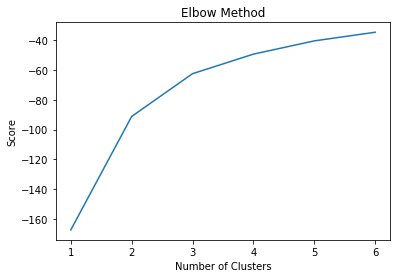

In [87]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

## Test mit unserem Datensatz

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


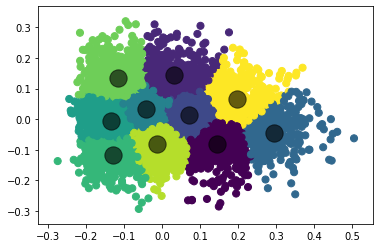

In [154]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(10, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [159]:
predicted_values

array([4, 6, 2, ..., 8, 4, 6], dtype=int64)

In [107]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [108]:
dfs

[   features     score
 0       the  0.060255
 1       you  0.049398
 2       and  0.043780
 3       she  0.043572
 4        to  0.042249
 5        me  0.039447
 6        my  0.038911
 7        it  0.036212
 8        in  0.029846
 9        oh  0.027024
 10       on  0.025599
 11      her  0.025423
 12       of  0.024544
 13     your  0.022853
 14     that  0.022630,
    features     score
 0       the  0.163232
 1       and  0.083265
 2        to  0.069222
 3       you  0.066990
 4        we  0.059326
 5        of  0.058205
 6        in  0.056316
 7        it  0.051253
 8        my  0.045121
 9      that  0.037986
 10       on  0.036756
 11      all  0.036202
 12       is  0.036030
 13       me  0.035512
 14     your  0.033309,
    features     score
 0       you  0.230795
 1        me  0.082669
 2        to  0.082573
 3       the  0.075451
 4        it  0.069024
 5       and  0.062878
 6      love  0.061892
 7      your  0.055730
 8        my  0.055685
 9      that  0.050158
 10      

# K-Means mit Sklearn

In [103]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

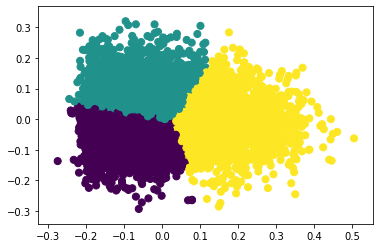

In [104]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')